# Exploratory Data Analysis Regarding Airbnb Ratings in Los Angeles - Group 22

Group Members:

- Ahmet Alperen Güngör - 28847

- Ali Cenker Yakışır - 28831

- Aydın Enes Bekar - 29546

- Batur Karakaya - 28881

- Cansın Narşahin - 29126

- İdil Yelçe - 28845

## Introduction

<font color="white">


- Airbnb is a widely used platform for providing accommodation services, and ratings are a crucial factor for users to choose their accommodation. Therefore, it might be beneficial for both hosts and guests to find out how these ratings are formed. Our aim is to investigate which factors, if any, have direct influence over overall ratings of users’ accommodation experience. 

- In order to do so, we aim to examine factors such as neighborhood, amenities, price etc. to determine if there is a causation between these factors. In the first step, we will clean our data to dispose of corrupted values and places with low numbers of given ratings. In the aftermath, we will examine the correlations between these factors and the rating of accommodation to conduct and test our hypothesis.
<br>

</font>

### Problem Definition

<font color="white">

- It varies from individual to individual what makes a great accommodation experience for them. Since most people choose their accommodation according to the ratings, the question of which factors increase the ratings is important. Some people may look for higher ratings, but their personal preferences for certain features may not always be reflected in the rating of a particular accommodation. So, they usually look for that feature’s quality in the comments section and lose lots of time. Therefore, in this context, our project aims to assist individuals in finding accommodations that align with their specific preferences in a more efficient manner.
<br>

</font>

### Utilized Datasets

<font color="white">

-  The datasets that we use in our project are taken from the following link http://insideairbnb.com/get-the-data/ under Los Angeles section, namely listings.csv.

-  In the main dataset, each row consists of the general information of the accommodation such as amenities, number of rooms and beds, rating of accommodation and so on (See Cell 1.1).

- Since our point of interest concerns a certain region. In its original form, our dataset included 45815 rows and 75 columns. Since our dataset contains incomplete rows and columns that are irrelevant to our goal, those rows and columns were filtered not just for easing further computations, but also for displaying more readable and more accurate values (See Cells 1.2, 1.3). 

- Additionally, since we aim to investigate the change in ratings, we have filtered the rows that had null value in their "review_scores_rating" column which had 10579 null values in total. After filtering both the rows and the columns, their number appeared to be 35236 and 21 respectively (See Cell 1.4-1.8).

- The data types that the columns included were float, string and integer values (See Cell 2.1). Furthermore, ratings of accommodations and their counts were plotted in Cell 2.2.
<br>

</font>

## Data Exploration

<font color="white">

- We will be clearing the data and remove the features that are irrelevant for our proejct. Some features are needed to be derived from some other columns we cannot use in given format. They will be refactored in a way that can be used for analysis.
<br>

</font>

Connect and load data from related path.

In [ ]:
# Cell 0.1

from google.colab import drive
drive.mount("./drive")

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
# Cell 0.2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from os.path import join


Examine the starting data. There are lots of columns like urls that are irrelevant for our work.

In [ ]:
# Cell 1.1

fname = 'listings.csv'             
path_prefix = 'drive/MyDrive/'
df = pd.read_csv(join(path_prefix, fname))
df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,183319,https://www.airbnb.com/rooms/183319,20220909140055,2022-09-10,previous scrape,Panoramic Ocean View Venice Beach,Craftsmen style penthouse with ocean view from...,About as close to the beach as you can live in...,https://a0.muscache.com/pictures/1170205/e2596...,867995,...,5.00,5.00,5.00,NaN,f,2,2,0,0,0.02
1,51307,https://www.airbnb.com/rooms/51307,20220909140055,2022-09-10,city scrape,Spanish Bungalow Guest House LA CA. 30 plus ni...,PRIVATE GUEST HOUSE<br /><br /><b>The space</b...,"Local LA Community , shops and restaurants in...",https://a0.muscache.com/pictures/294658/ac8d6e...,235568,...,4.85,4.95,4.76,NaN,f,2,2,0,0,0.98
2,184314,https://www.airbnb.com/rooms/184314,20220909140055,2022-09-10,previous scrape,Boho Chic Flat..Steps to Beach!,"Bright, airy, quiet 1 bdr located just steps f...",You are in one of the beach locations in Los A...,https://a0.muscache.com/pictures/0bc2f8b7-9378...,884031,...,4.93,4.89,4.85,NaN,t,1,1,0,0,0.22


In [ ]:
# Cell 1.2

num_rows, num_cols = df.shape
print("Initially, there are", num_rows ,"rows and", num_cols, "columns\n")

Initially, there are 45815 rows and 75 columns



We are listing the columns that are certainly not going to be used.

In [ ]:
# Cell 1.3

# The columns that we decided not to include in our project

to_del = ["review_scores_cleanliness", "review_scores_accuracy", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "host_neighbourhood", "accommodates", "reviews_per_month", 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
 'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count',
 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms', 'minimum_nights',
 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
 'calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'license', 'instant_bookable',
 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms','neighbourhood','number_of_reviews']



Drop the given columns and report the new shape:

In [ ]:
# Cell 1.4

df.drop(to_del, axis=1, inplace=True)
num_rows, num_cols = df.shape
print("After cleaning unusefull columns, there are", num_rows ,"rows and", num_cols, "columns\n")

After cleaning unusefull columns, there are 45815 rows and 14 columns



In [ ]:
# Cell 1.5

# Sample of the dataset after filtering columns

df.head(3)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,bathrooms_text,bedrooms,beds,amenities,price,review_scores_rating
0,183319,within a day,100%,100%,f,Venice,Entire rental unit,Entire home/apt,1 bath,2.0,2.0,"[""Bed linens"", ""Heating"", ""Dishes and silverwa...",$152.00,5.00
1,51307,NaN,NaN,NaN,f,Atwater Village,Entire bungalow,Entire home/apt,1 bath,1.0,1.0,"[""Air conditioning"", ""Bed linens"", ""Carbon mon...",$75.00,4.64
2,184314,NaN,NaN,NaN,f,Venice,Entire rental unit,Entire home/apt,1 bath,1.0,1.0,"[""Hangers"", ""Dryer"", ""Smoke alarm"", ""Kitchen"",...",$125.00,4.88


Number of null elements in each column prior to filtering rows:

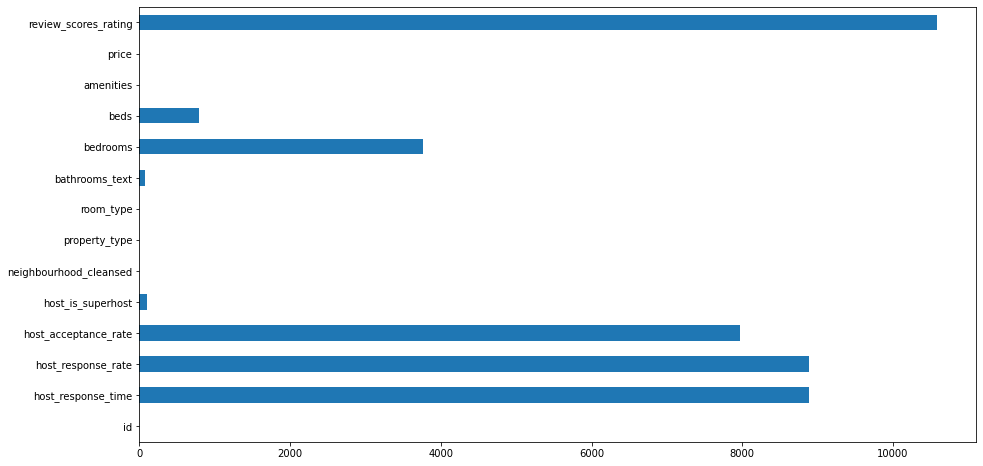

In [ ]:
# Cell 1.6

# Changing the size of the figure
plt.figure(figsize=(15,8))

# Count the number of null values in each column
null_counts = df.isnull().sum()

# Plot the null count for each column
null_counts.plot(kind='barh')

# Show the plot
plt.show()


Discard the rows with null ratings since it is our main parameter, and report the remained null values:

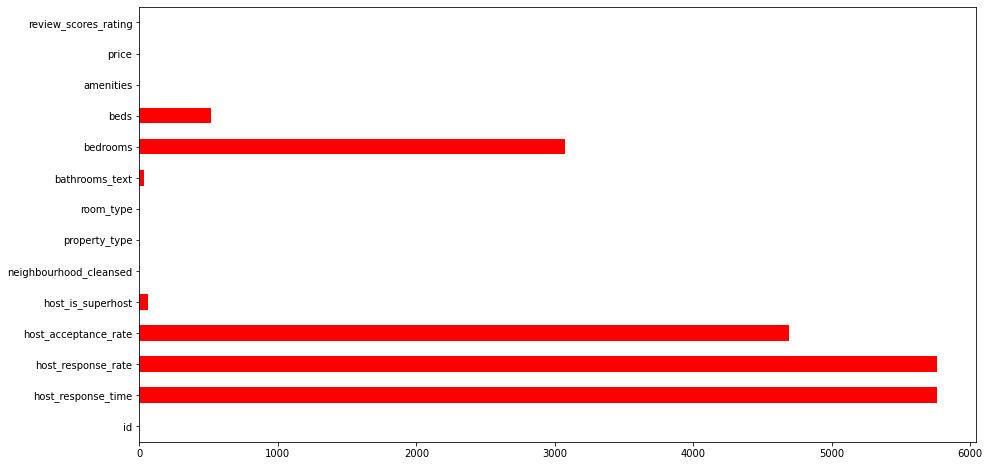

In [ ]:
# Cell 1.7

# Changing the size of the figure
plt.figure(figsize=(15,8))

# Since we are going to use ratings as our main parameter, we have discarded the rows which had null values in their "review_scores_rating" column.
df = df[(df['review_scores_rating'].notnull())]

# The null values remained in each column after filtering with respect to ratings are as follows:
# Count the number of null values in each column
null_counts = df.isnull().sum()

# Plot the null count for each column
null_counts.plot(kind='barh',color='red')

# Show the plot
plt.show()

Report the new shape and types of columns.

In [ ]:
# Cell 1.8

# After discarding null rating the number of rows and columns appeared to be as follows:
num_rows, num_cols = df.shape
print("\nAfter cleaning null ratings, there are", num_rows ,"rows and", num_cols, "columns\n")


After cleaning null ratings, there are 35236 rows and 14 columns



In [ ]:
# Cell 2.1

# The datatypes of the columns are as follows:
df.dtypes

id                          int64
host_response_time         object
host_response_rate         object
host_acceptance_rate       object
host_is_superhost          object
neighbourhood_cleansed     object
property_type              object
room_type                  object
bathrooms_text             object
bedrooms                  float64
beds                      float64
amenities                  object
price                      object
review_scores_rating      float64
dtype: object

We will take a look at the distribution of ratings.

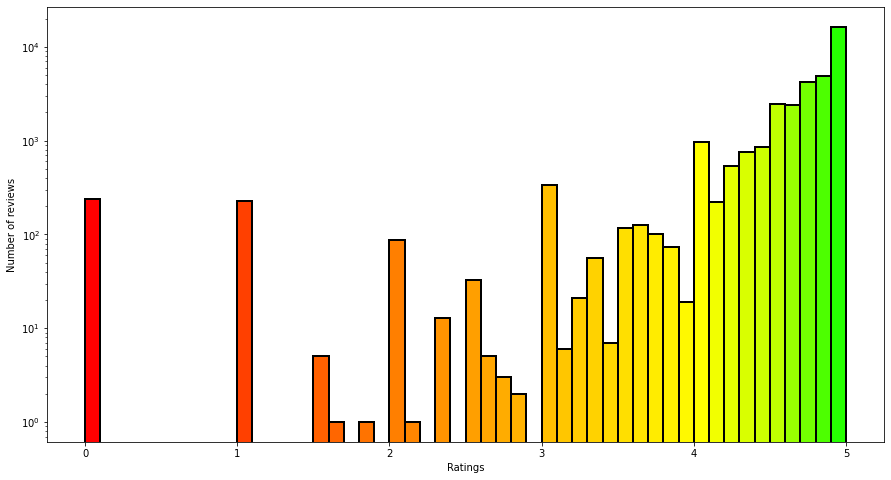

In [ ]:
# Cell 2.2

# Changing the size of the figure
plt.figure(figsize=(15,8))

# Bar chart of number of ratings vs ratings
reviews_hist,bins,patches= plt.hist(df['review_scores_rating'],bins=50, log = True)

# Set the x-axis label
plt.xlabel('Ratings')

# Set the y-axis label
plt.ylabel('Number of reviews')


# Setting the color of the each bar.
r = 1.0
g = 0.0
b = 0.0
color = (r,g,b)
for bar in patches:
  x, y = bar.get_xy()
  w = bar.get_width()
  bar.set_color(color)
  bar.set_edgecolor('black')
  bar.set_linewidth(2)
  if x < 4.0:
    g = g + 0.02499
  else:
    g = 1
    if x < 4.5:
      r = r - 0.05
    else:
      r = r - 0.14999
  color = (r,g,b)



# Show the plot
plt.show()

Now we need to refactor same of the features and generate some new ones:


* Prices are in a string format that contains "$" sign and "," as a seperator for thousands. We want them as doubles.




In [ ]:
# Cell 2.3

def currency_check (row):
  c = row['price']
  if c.find('$') == 0:
    return float(c.replace(',','')[1:])
  else:
    # We checked if there are any prices that are not in dollars
    print("Currency not dolar")
    
df['price'] = df.apply (lambda row: currency_check(row), axis=1)
df['price'].head()

0    152.0
1     75.0
2    125.0
3    189.0
4    115.0
Name: price, dtype: float64



*   We want to include some amenities to our examination. People enter the amenities themselves so there are lots of differently named amenities. Take a look at the amenities that are used more than 10,000 times.



In [ ]:
# Cell 2.4

dt = {}

for row in df.amenities:
  row = row[1:-1].split(',')
  for i in row:
    if i not in dt.keys():
      dt[i] = 1
    else:
      dt[i] += 1

cnt = 0
for key in dt.keys():
  if dt[key] > 10000:
    print(key)
    cnt += 1

print("\n")

# At the bottom, the amenities are sorted in decreasing order and printed.
dt_sorted = sorted(dt.items(), key=lambda x:x[1], reverse = True)
print(dt_sorted)
print("\n")

# The number of amenities that have count larger than 10000 
print(cnt)

# After analyzing the amenities with high counts, we came up with 5 different amenities that might have more considerable impact than the other amenities. These amenities are:
# Wifi, Kitchen, TV, Air Conditioning, Parking


 "Heating"
 "Dishes and silverware"
 "Extra pillows and blankets"
 "Smoke alarm"
 "TV"
 "Hot water"
 "Cooking basics"
 "Coffee maker"
 "Hangers"
 "Stove"
 "Wifi"
 "Iron"
 "Oven"
 "Kitchen"
 "Long term stays allowed"
 "Microwave"
 "Free street parking"
 "Fire extinguisher"
 "Refrigerator"
 "Bathtub"
 "Bed linens"
 "Carbon monoxide alarm"
 "Essentials"
 "Dryer"
 "Private entrance"
 "Dishwasher"
 "Washer"
 "Free parking on premises"
 "First aid kit"
 "Shampoo"
 "Hair dryer"
 "Air conditioning"
 "Shower gel"
 "Dedicated workspace"
 "Cleaning products"
 "Freezer"
 "Dining table"
 "Security cameras on property"


[(' "Wifi"', 32397), (' "Essentials"', 31819), (' "Long term stays allowed"', 31543), (' "Smoke alarm"', 30832), (' "Carbon monoxide alarm"', 30227), (' "Kitchen"', 29863), (' "Hair dryer"', 28618), (' "Hot water"', 27353), (' "Iron"', 26840), (' "Hangers"', 25960), (' "Shampoo"', 25675), (' "Dishes and silverware"', 25497), (' "Heating"', 25115), (' "Refrigerator"', 24439), (' "Cof



*   We choose 5 of them which we are curious to see their relevancy with ratings.



In [ ]:
 # Cell 3.1
 
 # Wifi, Kitchen, TV, Air Conditioning, Parking
 
 # At this cell, we created 5 new columns for each of our parameter and checked each row whether they contain our amenities in their amenities list.
 # If they had the parameters, we appended "True" value in their respective columns, otherwise we put "False". 

Wifi = []
TV = []
AirCondition = []
Parking = []
Kitchen = []
for row in df.amenities:

  row = row[1:-1].split(', ')  

  if '"Wifi"' in row:
    Wifi.append(True)
  else:
    Wifi.append(False)
  
  if '"Air conditioning"' in row:
    AirCondition.append(True)
  else:
    AirCondition.append(False)
  
  if '"Kitchen"' in row:
    Kitchen.append(True)
  else:
    Kitchen.append(False)
  
  if '"TV"' in row:
    TV.append(True)
  else:
    TV.append(False)
  
  if '"Free parking on premises"' in row:
    Parking.append(True)
  else:
    if '"Free street parking"' in row:
      Parking.append(True)
    else:
      Parking.append(False)

df["wifiBool"] = Wifi
df["tvBool"] = TV
df["airConditioningBool"] = AirCondition
df["parkingBool"] = Parking
df["kitchenBool"] = Kitchen


df.head(5)


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,bathrooms_text,bedrooms,beds,amenities,price,review_scores_rating,wifiBool,tvBool,airConditioningBool,parkingBool,kitchenBool
0,183319,within a day,100%,100%,f,Venice,Entire rental unit,Entire home/apt,1 bath,2.0,2.0,"[""Bed linens"", ""Heating"", ""Dishes and silverwa...",152.0,5.00,True,True,False,True,True
1,51307,NaN,NaN,NaN,f,Atwater Village,Entire bungalow,Entire home/apt,1 bath,1.0,1.0,"[""Air conditioning"", ""Bed linens"", ""Carbon mon...",75.0,4.64,False,True,True,True,True
2,184314,NaN,NaN,NaN,f,Venice,Entire rental unit,Entire home/apt,1 bath,1.0,1.0,"[""Hangers"", ""Dryer"", ""Smoke alarm"", ""Kitchen"",...",125.0,4.88,True,False,False,True,True
3,51498,within an hour,100%,88%,f,Mar Vista,Entire guesthouse,Entire home/apt,1 bath,NaN,1.0,"[""Toaster"", ""Cable TV"", ""Air conditioning"", ""B...",189.0,4.73,True,False,True,True,True
4,109,NaN,NaN,NaN,f,Culver City,Entire condo,Entire home/apt,2 baths,2.0,3.0,"[""Cable TV"", ""Air conditioning"", ""Carbon monox...",115.0,4.00,True,False,True,True,True


*   We visualized the distribution of amenities' values ​​with bar chart.  

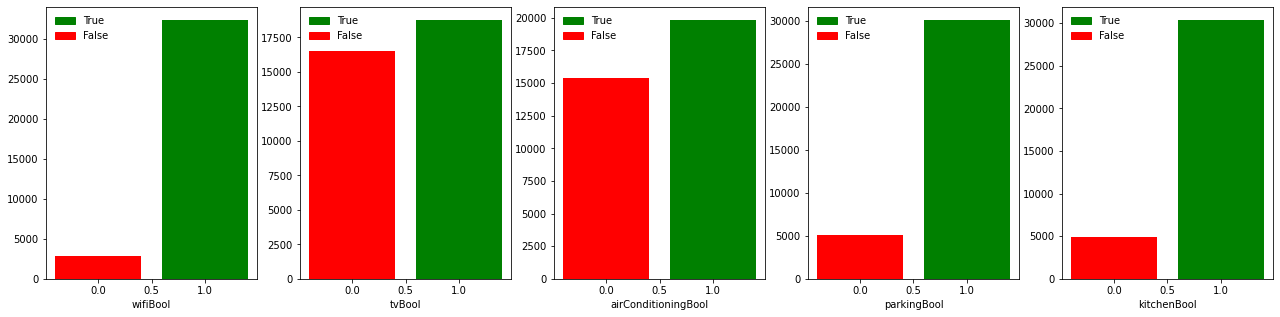

In [ ]:
wifi_counts = df['wifiBool'].value_counts()
tv_counts = df['tvBool'].value_counts()
air_conditioning_counts = df['airConditioningBool'].value_counts()
parking_counts = df['parkingBool'].value_counts()
kitchen_counts = df['kitchenBool'].value_counts()

fig, axs = plt.subplots(1, 5, figsize=(22, 5))
axs[0].bar([1, 0], wifi_counts.values, color=['green','red'])
axs[1].bar([1, 0], tv_counts.values, color=['green','red'])
axs[2].bar([1, 0], air_conditioning_counts.values, color=['green','red'])
axs[3].bar([1, 0], parking_counts.values, color=['green','red'])
axs[4].bar([1, 0], kitchen_counts.values, color=['green','red'])

axs[0].set_xlabel('wifiBool')
axs[1].set_xlabel('tvBool')
axs[2].set_xlabel('airConditioningBool')
axs[3].set_xlabel('parkingBool')
axs[4].set_xlabel('kitchenBool')

# Adding legend to graphs
colors = {'True':'green', 'False':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
for i in range(5):
  axs[i].legend(handles, labels,frameon=False)

plt.show()



*   Number and the privacy situatuon of the bathrooms were given as one string, we seperated the number and the info of if the bathroom is shared to two columns.



In [ ]:
 # Cell 3.2
 
isBathShared = []
bathNumber = []
for row in range(df.shape[0]):
  bathText = df.iloc[row]["bathrooms_text"]
  bathInfo = str(bathText).split(" ")

  if "shared" in bathInfo:
    isBathShared.append(True)
  else:
    isBathShared.append(False)

  bathNumber.append(bathInfo[0])

df["isBathShared"] = isBathShared
df["bathNumber"] = bathNumber
df.drop("bathrooms_text", axis=1, inplace=True)

for row in range(10):
  print(df.iloc[row]["id"], df.iloc[row]["bathNumber"], df.iloc[row]["isBathShared"])

183319 1 False
51307 1 False
184314 1 False
51498 1 False
109 2 False
185536 1 True
2708 1 True
51546 1 False
185557 1 True
2732 1 False


*   We created separate columns for room types and added them to the dataset.



In [ ]:
# create new columns initilize them to zero
df['Entire home/apt'] = 0
df['Private room'] = 0
df['Hotel room'] = 0
df['Shared room'] = 0

# make values 1 accordingly
df.loc[df['room_type'] == 'Entire home/apt', 'Entire home/apt'] = 1
df.loc[df['room_type'] == 'Private room', 'Private room'] = 1
df.loc[df['room_type'] == 'Hotel room', 'Hotel room'] = 1
df.loc[df['room_type'] == 'Shared room', 'Shared room'] = 1

df.head(7)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,property_type,room_type,bedrooms,beds,...,tvBool,airConditioningBool,parkingBool,kitchenBool,isBathShared,bathNumber,Entire home/apt,Private room,Hotel room,Shared room
0,183319,within a day,100%,100%,f,Venice,Entire rental unit,Entire home/apt,2.0,2.0,...,True,False,True,True,False,1,1,0,0,0
1,51307,NaN,NaN,NaN,f,Atwater Village,Entire bungalow,Entire home/apt,1.0,1.0,...,True,True,True,True,False,1,1,0,0,0
2,184314,NaN,NaN,NaN,f,Venice,Entire rental unit,Entire home/apt,1.0,1.0,...,False,False,True,True,False,1,1,0,0,0
3,51498,within an hour,100%,88%,f,Mar Vista,Entire guesthouse,Entire home/apt,NaN,1.0,...,False,True,True,True,False,1,1,0,0,0
4,109,NaN,NaN,NaN,f,Culver City,Entire condo,Entire home/apt,2.0,3.0,...,False,True,True,True,False,2,1,0,0,0
5,185536,within a few hours,100%,80%,f,Westchester,Private room in home,Private room,1.0,1.0,...,False,False,True,True,True,1,0,1,0,0
6,2708,within an hour,100%,100%,t,Hollywood,Private room in rental unit,Private room,1.0,1.0,...,False,False,True,True,True,1,0,1,0,0


We plotted the correlation levels of each row with each other. At first glance it seems to be there is no strong correlation between any feature and rating scores. We will investigate the relationships as we progress. 

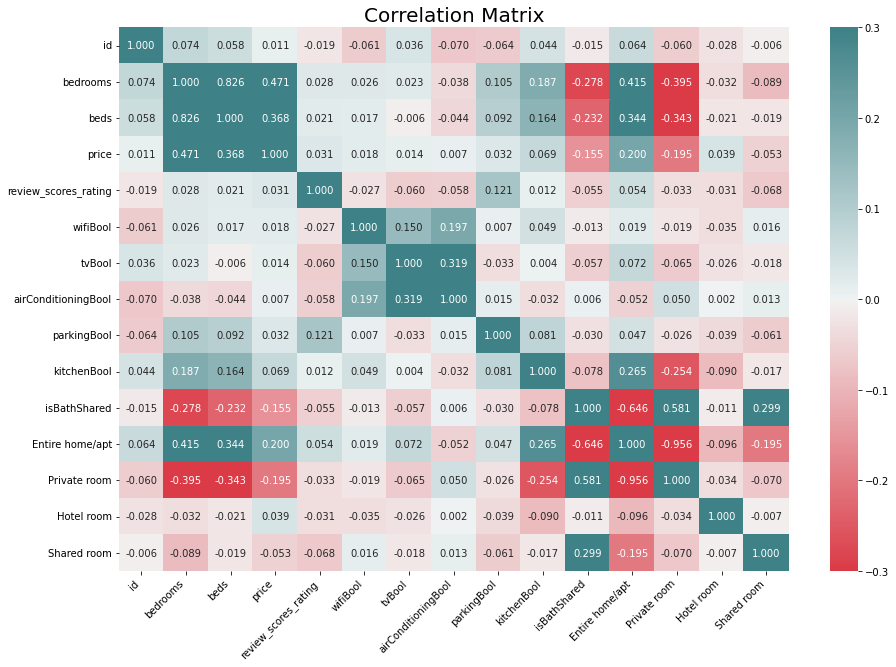

In [ ]:
 # Cell 4.1
 

# Set the figure size
plt.figure(figsize=(15, 10))

# Create a diverging color palette
palette = sns.diverging_palette(10, 200, n=256)

# Calculate the Pearson correlation of the DataFrame
corr = df.corr(method='pearson')

# Plot the heatmap
sns.heatmap(corr, annot=True, fmt=".3f", cmap=palette, vmin=-0.3, vmax=0.3)

# Rotate the x-axis tick labels
plt.xticks(rotation=45, horizontalalignment = "right")

# Set the title
plt.title("Correlation Matrix", size=20)

# Show the plot
plt.show()

**Our Null Hypoteshis is that elements will have no effect on overall ratings of listings. Our alternative hypothesis is that there is correlation between them. We will do the testings for different amenities.**

Our confidence level is 95%.

*   We calculated the variance of number of beds and excluded groups with variance 0 or with fewer than two data points from the ANOVA test. 
*   Then, with ANOVA test we printed the p-values and created a bar chart of the mean review scores for each group



P value is:  0.003990705577647338 

Null hyp: number of beds do not affect review score
We rejected the null hyp.


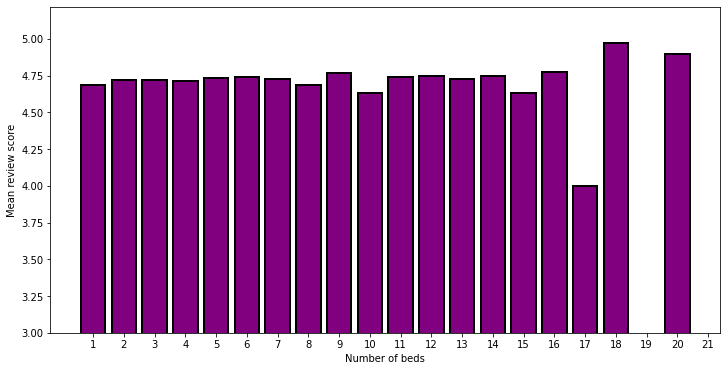

In [ ]:
from scipy.stats import f_oneway
from statistics import variance
import matplotlib.pyplot as plt

test_list=[]
for i in range(1,27):
  test_list.append(df[df["beds"] == i]["review_scores_rating"])

# Create a list of groups with non-zero variance
non_zero_var_groups = []
for group in test_list:
  if group.count() > 1 and variance(group.dropna()) > 0:
    non_zero_var_groups.append(group)

statistic, p_value = f_oneway(*non_zero_var_groups)

print("P value is: ",p_value,"\n")

# Extract the review scores and the number of beds for each group
review_scores = [group.tolist() for group in non_zero_var_groups]
beds = [i+1 for i, group in enumerate(test_list) if group.count() > 1 and variance(group.dropna()) > 0]

mean_review_scores = [sum(group)/len(group) for group in review_scores]

# Create a bar chart of the mean review scores for each group
plt.xticks(range(1,27))
plt.bar(beds, mean_review_scores,color='purple',edgecolor='black',linewidth=2)
plt.xlabel("Number of beds")
plt.ylabel("Mean review score")

plt.ylim(bottom=3)

fig = plt.gcf()
fig.set_size_inches(12, 6)

print("Null hyp: number of beds do not affect review score")
if p_value < 0.05:
  print("We rejected the null hyp.")
else:
  print("We couldn't reject the null hyp.")





*   We did the same for bedrooms



0.00012114811052540141
Null hyp: number of bedrooms do not affect review score
We rejected the null hyp.


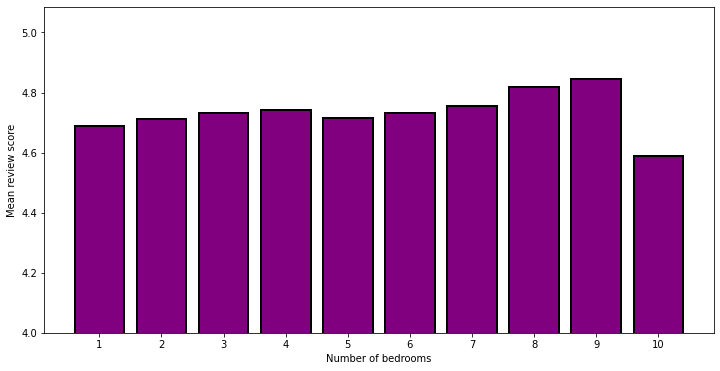

In [ ]:
test_list=[]
for i in range(1,27):
  test_list.append(df[df["bedrooms"] == i]["review_scores_rating"])

# Create a list of groups with non-zero variance
non_zero_var_groups = []
for group in test_list:
  if group.count() > 1 and variance(group.dropna()) > 0:
    non_zero_var_groups.append(group)

# Perform ANOVA test on groups with non-zero variance
statistic, p_value = f_oneway(*non_zero_var_groups)

# Print the p-value
print(p_value)

# Extract the review scores for each group
review_scores = [group.tolist() for group in non_zero_var_groups]

# Extract the number of beds for each group
beds = [i+1 for i, group in enumerate(test_list) if group.count() > 1 and variance(group.dropna()) > 0]

# Compute the mean review score for each group
mean_review_scores = [sum(group)/len(group) for group in review_scores]

# Create a bar chart of the mean review scores for each group
plt.xticks(range(1,27))
plt.bar(beds, mean_review_scores,color='purple',edgecolor='black',linewidth=2)
plt.xlabel("Number of bedrooms")
plt.ylabel("Mean review score")

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.ylim(bottom=4)

print("Null hyp: number of bedrooms do not affect review score")
if p_value < 0.05:
  print("We rejected the null hyp.")
else:
  print("We couldn't reject the null hyp.")




*   We used a box plot to show the relationship between room type and review score.



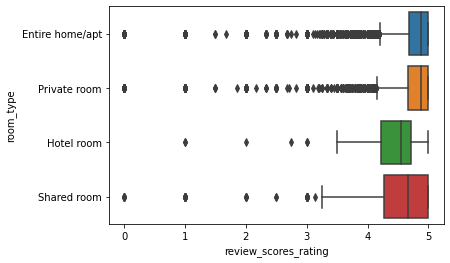

In [ ]:
room_types = df['room_type'].unique()

sns.boxplot(x='review_scores_rating', y='room_type', data=df)
plt.show()

In [ ]:
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm

def p_returner(df1,df2):
  z = (df1.mean()-df2.mean())/np.sqrt(df1.std()**2/len(df1) + df2.std()**2/len(df2))
  p = 2*norm.cdf(-abs(z))
  return p,z

entire_home_review_scores = df[df['room_type'] == 'Entire home/apt']['review_scores_rating']
not_entire_home_review_scores = df[df['room_type'] != 'Entire home/apt']['review_scores_rating']
print("Z value for entire home/apt: ", p_returner(entire_home_review_scores,not_entire_home_review_scores)[1])
print("P value for entire home/apt: ", p_returner(entire_home_review_scores,not_entire_home_review_scores)[0])
print()

private_room_review_scores = df[df['room_type'] == 'Private room']['review_scores_rating']
not_private_room_review_scores = df[df['room_type'] != 'Private room']['review_scores_rating']
print("Z value for private rooms: ", p_returner(private_room_review_scores,not_private_room_review_scores)[1])
print("P value for private rooms: ", p_returner(private_room_review_scores,not_private_room_review_scores)[0])
print()

hotel_room_review_scores = df[df['room_type'] == 'Hotel room']['review_scores_rating']
not_hotel_room_review_scores = df[df['room_type'] != 'Hotel room']['review_scores_rating']
print("Z value for hotel room: ", p_returner(hotel_room_review_scores,not_hotel_room_review_scores)[1])
print("P value for hotel room: ", p_returner(hotel_room_review_scores,not_hotel_room_review_scores)[0])
print()

shared_room_review_scores = df[df['room_type'] == 'Shared room']['review_scores_rating']
not_shared_room_review_scores = df[df['room_type'] != 'Shared room']['review_scores_rating']
print("Z value for shared rooms: ", p_returner(shared_room_review_scores,not_shared_room_review_scores)[1])
print("P value for shared rooms: ", p_returner(shared_room_review_scores,not_shared_room_review_scores)[0])
print()


Z value for entire home/apt:  9.02898334880962
P value for entire home/apt:  1.7327402957308477e-19

Z value for private rooms:  -5.565549445682971
P value for private rooms:  2.613276662647351e-08

Z value for hotel room:  -5.440328748698672
P value for hotel room:  5.318234052431564e-08

Z value for shared rooms:  -7.762333983925359
P value for shared rooms:  8.338048024527338e-15



In [ ]:

from scipy.stats import norm

from scipy.optimize.minpack import dtype
from sklearn.linear_model import LinearRegression

df['review_scores_rating'] = df['review_scores_rating'].replace(-np.inf, 0)
y = df['review_scores_rating']

#regression analysis of individual amenities
df['wifi'] = df['wifiBool'].astype(int)
df['tv'] = df['tvBool'].astype(int)
df['airConditioning'] = df['airConditioningBool'].astype(int)
df['parking'] = df['parkingBool'].astype(int)
df['kitchen'] = df['kitchenBool'].astype(int)

# Wifi
wifi = df[df['wifi'] == 1]['review_scores_rating']
no_wifi = df[df['wifi'] == 0]['review_scores_rating']

wifi_mean = wifi.mean()
wifi_std = wifi.std()
no_wifi_mean = no_wifi.mean()
no_wifi_std = no_wifi.std()

z = (wifi_mean - no_wifi_mean) / np.sqrt(wifi_std**2 / len(wifi) + no_wifi_std**2 / len(no_wifi))
p_value = 2*norm.cdf(-abs(z))
print("Z value for existence of wifi: ", z)
print("P value for existence of wifi: ", p_value)
print()


# Parking
parking = df[df['parking'] == 1]['review_scores_rating']
no_parking = df[df['parking'] == 0]['review_scores_rating']

parking_mean = parking.mean()
parking_std = parking.std()
no_parking_mean = no_parking.mean()
no_parking_std = no_parking.std()

z = (parking_mean - no_parking_mean) / np.sqrt(parking_std**2 / len(parking) + no_parking_std**2 / len(no_parking))
p_value = 2*norm.cdf(-abs(z))
print("Z value for existence of parking: ", z)
print("P value for existence of parking: ", p_value)
print()

# TV
tv = df[df['tv'] == 1]['review_scores_rating']
no_tv = df[df['tv'] == 0]['review_scores_rating']

tv_mean = tv.mean()
tv_std = tv.std()
no_tv_mean = no_tv.mean()
no_tv_std = no_tv.std()

z = (tv_mean - no_tv_mean) / np.sqrt(tv_std**2 / len(tv) + no_tv_std**2 / len(no_tv))
p_value = 2*norm.cdf(-abs(z))
print("Z value for existence of tv: ", z)
print("P value for existence of tv: ", p_value)
print()

# Air conditioning
air_conditioning = df[df['airConditioning'] == 1]['review_scores_rating']
no_air_conditioning = df[df['airConditioning'] == 0]['review_scores_rating']

air_conditioning_mean = air_conditioning.mean()
air_conditioning_std = air_conditioning.std()

no_air_conditioning_mean = no_air_conditioning.mean()
no_air_conditioning_std = no_air_conditioning.std()

z = (air_conditioning_mean - no_air_conditioning_mean) / np.sqrt(air_conditioning_std**2 / len(air_conditioning) + no_air_conditioning_std**2 / len(no_air_conditioning))
p_value = 2*norm.cdf(-abs(z))
print("Z value for existence of air conditioning: ", z)
print("P value for existence of air conditioning: ", p_value)
print()

# Kitchen
kitchen = df[df['kitchen'] == 1]['review_scores_rating']
no_kitchen = df[df['kitchen'] == 0]['review_scores_rating']

kitchen_mean = kitchen.mean()
kitchen_std = kitchen.std()
no_kitchen_mean = no_kitchen.mean()
no_kitchen_std = no_kitchen.std()

z = (kitchen_mean - no_kitchen_mean) / np.sqrt(kitchen_std**2 / len(kitchen) + no_kitchen_std**2 / len(no_kitchen))
p_value = 2*norm.cdf(-abs(z))
print("Z value for existence of kitchen: ", z)
print("P value for existence of kitchen: ", p_value)
print()

Z value for existence of wifi:  -5.4650759847734625
P value for existence of wifi:  4.6270855607269215e-08

Z value for existence of parking:  16.44316559294272
P value for existence of parking:  9.388420760710153e-61

Z value for existence of tv:  -11.047372155017472
P value for existence of tv:  2.2572575239384607e-28

Z value for existence of air conditioning:  -11.182192108159342
P value for existence of air conditioning:  4.984336134006006e-29

Z value for existence of kitchen:  2.241354442608315
P value for existence of kitchen:  0.025003125019585355



All of these amenities have p values lower than 0.05 therefore we reject the null hypothesis.

## Machine Learning Models


In [ ]:


Xwifi = df[['wifi']]
Xtv = df[['tv']]
XairConditioning = df[['airConditioningBool']]
Xparking = df[['parking']]
Xkitchen = df[['kitchenBool']]

modelwifi = LinearRegression()
modelwifi.fit(Xwifi, y)

modeltv = LinearRegression()
modeltv.fit(Xtv, y)

modelairConditioning = LinearRegression()
modelairConditioning.fit(XairConditioning, y)

modelparking = LinearRegression()
modelparking.fit(Xparking, y)

modelkitchen = LinearRegression()
modelkitchen.fit(Xkitchen, y)

print("Coefficient of existence of wifi:", modelwifi.coef_[0])
print("Intercept of existence of wifi:", modelwifi.intercept_)
print()

print("Coefficient of existence of tv:", modeltv.coef_[0])
print("Intercept of existence of tv:", modeltv.intercept_)
print()

print("Coefficient of existence of air conditioner:", modelairConditioning.coef_[0])
print("Intercept of existence of air conditioner:", modelairConditioning.intercept_)
print()

print("Coefficient of existence of parking:", modelparking.coef_[0])
print("Intercept of existence of parking:", modelparking.intercept_)
print()

print("Coefficient of existence of kitchen:", modelkitchen.coef_[0])
print("Intercept of existence of kitchen:", modelkitchen.intercept_)
print()


#regression analysis of number of beds
mean_beds = df['beds'].mean()
df['beds'] = df['beds'].fillna(mean_beds)

Xbeds = df[['beds']]

modelbeds = LinearRegression()
modelbeds.fit(Xbeds, y)

print("Coefficient of number of beds:", modelbeds.coef_[0])
print("Intercept of number of beds:", modelbeds.intercept_)
print()

#regression analysis of number of bedrooms
mean_bedrooms = df['bedrooms'].mean()
df['bedrooms'] = df['bedrooms'].fillna(mean_bedrooms)

Xbedrooms = df[['bedrooms']]

modelbedrooms = LinearRegression()
modelbedrooms.fit(Xbedrooms, y)

print("Coefficient of number of bedrooms:", modelbedrooms.coef_[0])
print("Intercept of number of bedrooms:", modelbedrooms.intercept_)
print()


#regression analysis of price
Xprice = df[['price']]

modelprice = LinearRegression()
modelprice.fit(Xprice, y)

print("Coefficient of price", modelprice.coef_[0])
print("Intercept of price", modelprice.intercept_)
print()


#regression analysis of individual room types

Xentire = df[['Entire home/apt']]
Xprivate = df[['Private room']]
Xhotel = df[['Hotel room']]
Xshared = df[['Shared room']]

modelentire = LinearRegression()
modelentire.fit(Xentire, y)

modelprivate = LinearRegression()
modelprivate.fit(Xprivate, y)

modelhotel = LinearRegression()
modelhotel.fit(Xhotel, y)

modelshared = LinearRegression()
modelshared.fit(Xshared, y)

print("Coefficent of entire homes/apts: ", modelentire.coef_[0])
print("Intercept of entire homes/apts: ", modelentire.intercept_)
print()

print("Coefficent of private rooms: ", modelprivate.coef_[0])
print("Intercept of private rooms: ", modelprivate.intercept_)
print()

print("Coefficent of hotel rooms: ", modelhotel.coef_[0])
print("Intercept of hotel rooms: ", modelhotel.intercept_)
print()

print("Coefficent of shared rooms: ", modelshared.coef_[0])
print("Intercept of shared rooms: ", modelshared.intercept_)
print()


Coefficient of existence of wifi: -0.06073086184135102
Intercept of existence of wifi: 4.7571190053285966

Coefficient of existence of tv: -0.07357158088964182
Intercept of existence of tv: 4.735641257995735

Coefficient of existence of air conditioner: -0.07147759144716291
Intercept of existence of air conditioner: 4.7414901909835

Coefficient of existence of parking: 0.21211524841165114
Intercept of existence of parking: 4.5198018053375195

Coefficient of existence of kitchen: 0.020738093140468008
Intercept of existence of kitchen: 4.683366885784716

Coefficient of number of beds: 0.007255743135469609
Intercept of number of beds: 4.684449877573911

Coefficient of number of bedrooms: 0.01444551157509387
Intercept of number of bedrooms: 4.6747694380378215

Coefficient of price 4.292552042276845e-05
Intercept of price 4.690662320982031

Coefficent of entire homes/apts:  0.07465596997601706
Intercept of entire homes/apts:  4.646970484306797

Coefficent of private rooms:  -0.0462589336595

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- kitchenBool
Feature names seen at fit time, yet now missing:
- beds

  warnings.warn(message, FutureWarning)


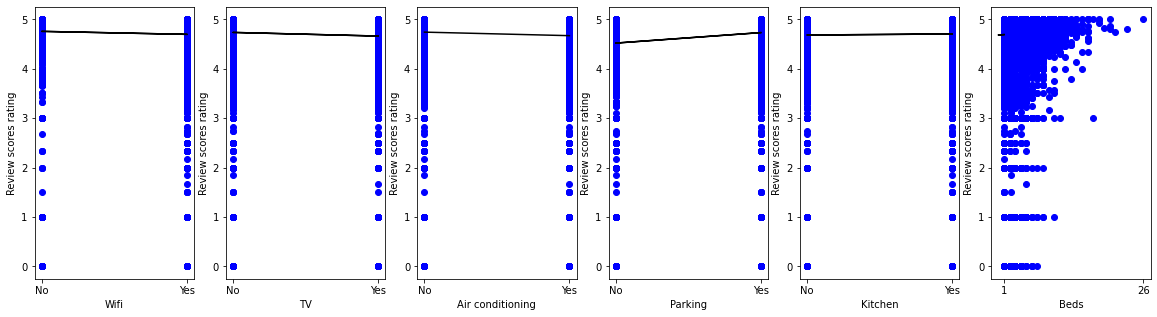

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Hotel room
Feature names seen at fit time, yet now missing:
- Private room

  warnings.warn(message, FutureWarning)


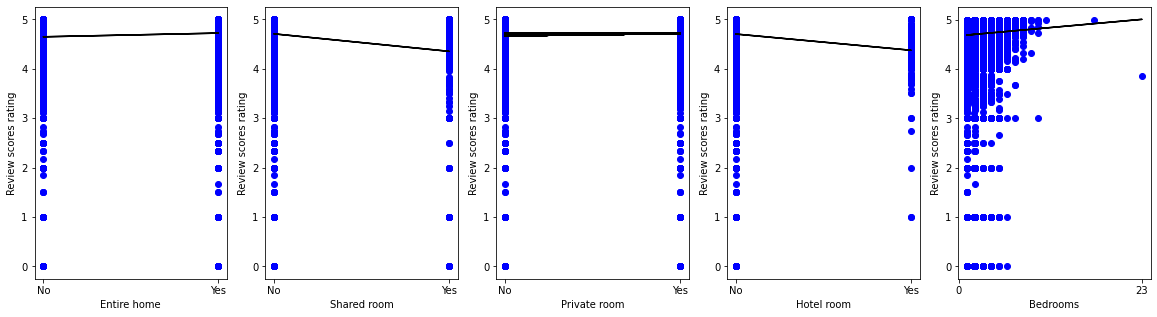

In [ ]:

# Set up the figure and subplots
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(20, 5))

# Plot the model for wifi
axs[0].scatter(Xwifi, y, color='b')
axs[0].plot(Xwifi, modelwifi.predict(Xwifi), color='k')
axs[0].set_xlabel('Wifi')
axs[0].set_ylabel('Review scores rating')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['No', 'Yes'])

# Plot the model for tv
axs[1].scatter(Xtv, y, color='b')
axs[1].plot(Xtv, modeltv.predict(Xtv), color='k')
axs[1].set_xlabel('TV')
axs[1].set_ylabel('Review scores rating')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['No', 'Yes'])

# Plot the model for air conditioning
axs[2].scatter(XairConditioning, y, color='b')
axs[2].plot(XairConditioning, modelairConditioning.predict(XairConditioning), color='k')
axs[2].set_xlabel('Air conditioning')
axs[2].set_ylabel('Review scores rating')
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['No', 'Yes'])

# Plot the model for parking
axs[3].scatter(Xparking, y, color='b')
axs[3].plot(Xparking, modelparking.predict(Xparking), color='k')
axs[3].set_xlabel('Parking')
axs[3].set_ylabel('Review scores rating')
axs[3].set_xticks([0, 1])
axs[3].set_xticklabels(['No', 'Yes'])

# Plot the model for kitchen
axs[4].scatter(Xkitchen, y, color='b')
axs[4].plot(Xkitchen, modelkitchen.predict(Xkitchen), color='k')
axs[4].set_xlabel('Kitchen')
axs[4].set_ylabel('Review scores rating')
axs[4].set_xticks([0, 1])
axs[4].set_xticklabels(['No', 'Yes'])

# Plot the model for beds
axs[5].scatter(Xbeds, y, color='b')
axs[5].plot(Xkitchen, modelbeds.predict(Xkitchen), color='k')
axs[5].set_xlabel('Beds')
axs[5].set_ylabel('Review scores rating')
axs[5].set_xticks([1, 26])


plt.show()


fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

# Plot the model for entire room
axs[0].scatter(Xentire, y, color='b')
axs[0].plot(Xentire, modelentire.predict(Xentire), color='k')
axs[0].set_xlabel('Entire home')
axs[0].set_ylabel('Review scores rating')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['No', 'Yes'])

# Plot the model for shared room
axs[1].scatter(Xshared, y, color='b')
axs[1].plot(Xshared, modelshared.predict(Xshared), color='k')
axs[1].set_xlabel('Shared room')
axs[1].set_ylabel('Review scores rating')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['No', 'Yes'])

# Plot the model for private room
axs[2].scatter(Xprivate, y, color='b')
axs[2].plot(Xprivate, modelprivate.predict(Xhotel), color='k')
axs[2].set_xlabel('Private room')
axs[2].set_ylabel('Review scores rating')
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['No', 'Yes'])

# Plot the model for hotel room
axs[3].scatter(Xhotel, y, color='b')
axs[3].plot(Xhotel, modelhotel.predict(Xhotel), color='k')
axs[3].set_xlabel('Hotel room')
axs[3].set_ylabel('Review scores rating')
axs[3].set_xticks([0, 1])
axs[3].set_xticklabels(['No', 'Yes'])

# Plot the model for bedrooms
axs[4].scatter(Xbedrooms, y, color='b')
axs[4].plot(Xbedrooms, modelbedrooms.predict(Xbedrooms), color='k')
axs[4].set_xlabel('Bedrooms')
axs[4].set_ylabel('Review scores rating')
axs[4].set_xticks([0, 23])


plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score



# Select the relevant columns for training
X = df[['wifi', 'airConditioning','parking', 'kitchen', 'tv']]
y = df['review_scores_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict the test target values
y_pred = model.predict(X_test)

# Calculate the performance metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE:', mae)
print('R2:', r2)


MAE: 0.3067417865309087
R2: 0.024675364329887373


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Select the relevant columns for training
X = df[['wifi', 'airConditioning', 'parking', 'kitchen', 'tv']]
y = df['review_scores_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict the test target values
y_pred = model.predict(X_test)

# Calculate the performance metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE:', mae)
print('R2:', r2)

MAE: 0.3068977898142212
R2: 0.02471352564833984


## Conclusion

<font color="white">

- As we stated earlier, our main goal is to assist individuals in finding accommodations that align with their preferences, while also providing insights for hosts regarding how they can improve their listings to get higher ratings.

- According to our analysis of the Los Angeles AirBnB data, there are multiple apparent factors that affect average ratings of individual listings. Availability of parking spots and kitchens are one important factor, in addition, increasing number of beds and bedrooms has positive impact on ratings as well. Furthermore, entire homes and apartmens has higher average ratings than other types of listings such as private/shared rooms and hotel rooms.

- Accuracy of our machine learning model is not very high since there is no significant increase/ decrease in ratings with respect to different factors (for example, existence of parking spot has a positive impact on average rating, yet it only increases from around 4.5 to 4.7). A deeper analysis of AirBnb databases may result in a more accurate machine learning algorithm, which we will be talking about in the future work part. 


<br>

</font>


## Future Work

<font color="white">

- In the future, the methods that are used here can also be used for other cities as well as Los Angeles to see if there are any other regional factors that might have influence over the ratings. Furthermore, our model can be further improved to predict the expected rating of an accommodation if certain features are satisfied for the accommodation.

- In addition, our work can be further improved for predicting other countries that have Airbnb service, and more defining and influencing factors might be collected, and the ratings could be analyzed more deeply. Thus the users from other countries may benefit from the outcomes of this and further researches.

- Furthermore, additional machine learning models and statistic methods could be used for additional research to predict an approximate rating for the accommodation or finding what factors have greater effect on altering rating of the accommodation.

- Lastly, the some amenities of the accommodations that are written explicitly such as 'LG Smart TV' could be handled as special cases. Since we have filtered such amenities, future researches might choose to analyze explicit amenities more deeply and fill the missing data with suitable values. After doing so, there is a posibility of acquiring more precise results by collecting more data in future.
<br>

</font>

## Work Division

<font color="white">

In our project,

- Alperen is in charge of Hypothesis Testing and analysis of linear regression models.


- Batur is responsible for preparing the documentation, adding some features and help with Hypothesis Testing.


- Cansın manages the visualization of the datasets and refactoring some of the columns to increase usability.


- Cenker is in control of preparing the documentation and improved the the visualization.


- Enes is taking care of cleaning of the dataset and feature enginnering.


- İdil is mostly concerned with machine learning and handling the amenities feature.


In addition, the tasks of each teammate are not necessarily fixed. Each member of the team aids one another when they have time. Furthermore, they gather or find methods, data, information that might contribute to the project.
<br>

</font>